# Modelo predicción de fuga de clientes

# Resumen ejecutivo
Se encuentra un data frame de 19 variables independientes, y 1 dependiente, por lo que se está frente a un problema de machine learning de aprendizaje supervisado. La variable dependiente es categórica, por lo que se enfrenta el desafío con modelos de clasificación: Tree regresion, KNN, logistic, Naive Bayes. El mejor resultado lo tiene Tree regresion con 88% en el dataset de test, con 3 variables que más influyen: Edad, Genero, nivel educacional. Para mejorar el modelo se propone capturar nuevas variables independientes, y seguir probando con nuevos modelos.

# Objetivo General:
¿cómo predecir la potencial fuga de clientes?, a trav´es de la generaci´on de
un modelo de predicci´on de fuga, que permita a la gerencia comercial tomar decisiones
basadas en datos e insight relevantes.

# Objetivo Específicos:

1 Realizar un análisis exploratorio de la informaci´on comercial proporcionada por el
cliente.

2 Generar un modelo para la estimación de la fuga de clientes, a través de la construcción de modelos ad-hoc. (por ejemeplo: regresión logística, k-vecinos más cercanos,
árboles de decisión, entre otros.)

3 Determinar el mejor modelo que nos permita entender y ayude a predecir las razones
en torno a la fuga de clientes.

4 Proporcionar información necesaria y suficiente para la toma de decisiones comerciales, que permitan aumentar la tasa de retenci´on de clientes, maximizando los
beneficios esperados.


Información del dataset
COD OFI: código único identificador de la oficina del cliente

COD COM: código único identificador de la comuna

D mes: variable numérica que indica la diferencia contable del mes actual

M MOROSO: número de meses en que un determinado cliente ha estado moroso


# Solución

In [611]:
#Importe de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Para graficar
from sklearn.tree import DecisionTreeClassifier #librería para arbol de clasificaciones
from sklearn.preprocessing import OrdinalEncoder #librería para pasar variables ordinales a numéricas
import datetime #Librería para trabajar variables de formato tiempo
from sklearn.preprocessing import LabelEncoder #Librería para pasar variables cualitativas a numéricas
from sklearn.preprocessing import StandardScaler #Librería para estandarizar valores 
from sklearn.neighbors import KNeighborsClassifier # librerías para crear modelos de KNN
from sklearn.model_selection import cross_val_predict, cross_val_score # Librerías para crear modelos de KNN
from sklearn.metrics import plot_roc_curve #Para roc_auc
from sklearn.metrics import confusion_matrix # Para matriz de confusión
from sklearn.metrics import plot_confusion_matrix # importamos librería para mostrar matriz de confusión
from sklearn.metrics import classification_report #Para analizar recall y precisión
from sklearn.metrics import precision_recall_curve #Para curva de precisión vs recall
from sklearn.metrics import roc_auc_score #Para roc_auc
from sklearn.metrics import accuracy_score # importamos librería para medir precisión
from sklearn.naive_bayes import MultinomialNB #Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #Logistic regresion
from sklearn import metrics

In [612]:
#Instalaciones
#pip install Jinja2 #sacar primer hashtag si no se tiene instalado

# 1 Realizar un análisis exploratorio de la información comercial proporcionada por el cliente.

In [613]:
#Lectura del dataframe a utilizar
path = 'https://raw.githubusercontent.com/edofarias/Predicci-n-fuga-de-clientes/main/data%20-%20BASE%20GENERAL.csv'
df = pd.read_csv(path, sep=",",low_memory=False)
print (df.shape)
df.head(20)

(2294, 20)


,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
0,1.0,M,746.476,39.0,MED,CAS,68,213,LOS ANGELES,0,38.292,0,434.357,1.766,9.110,340.000,2,2.000.000,NO,NO FUGA
1,2.0,F,11.901,49.0,MED,VIU,16,89,SANTIAGO,0,0,0,0,48.000,0.000,0.000,1,7.500.000,SI,NO FUGA
2,3.0,M,1.651.421,39.0,TEC,CAS,90,16,ANTOFAGASTA,0,604.169,0,0,323.000,26.489,2.925,1,8.000.000,NO,NO FUGA
3,4.0,F,638.969,36.0,UNV,CAS,85,115,SANTIAGO,0,5.125,0,198.998,94.000,0.000,105.000,1,2.600.000,NO,NO FUGA
4,5.0,M,860.113,44.0,TEC,CAS,45,80,SANTIAGO,0,11.946,0,73.959,149.000,0.000,272.000,1,6.400.000,NO,NO FUGA
5,6.0,M,329.463,40.0,TEC,CAS,53,92,SANTIAGO,0,187.538,0,12.008,641.000,118.000,154.000,2,7.700.000,NO,FUGA
6,7.0,M,28.732,45.0,UNV,CAS,55,90,SANTIAGO,559.984,532.706,0,0,1.464,15.600,1.523,1,2.900.000,NO,FUGA
7,8.0,F,11.563,41.0,TEC,SOL,47,112,SANTIAGO,0,141.317,0,525.325,13.000,0.000,477.000,1,2.100.000,SI,NO FUGA
8,9.0,F,3.044.549,33.0,MED,CAS,22,1,ARICA,0,102.078,0,0,44.000,0.000,0.000,1,1.600.000,NO,NO FUGA
9,10.0,F,3.632.707,39.0,MED,VIU,27,89,SANTIAGO,0,162.658,0,445.896,865.000,0.000,907.000,1,2.800.000,NO,NO FUGA


En este caso, vemos que la variable dependiente está clara, el resto son variables independientes. Por lo tanto estamos frente a un problema de aprendizaje supervisado.

In [614]:
df.dtypes #Análizamos formato de los datos

ID              float64
GENERO           object
RENTA            object
EDAD            float64
NIV_EDUC         object
E_CIVIL          object
COD_OFI           int64
COD_COM          object
CIUDAD           object
D_Marzo          object
D_Abril          object
D_Mayo           object
D_Junio          object
D_Julio         float64
D_Agosto        float64
D_Septiembre    float64
M_MOROSO          int64
MONTO            object
SEGURO           object
FUGA             object
dtype: object

Genero: Categórica nominal

Renta: Numérica continua

Edad: Numérica discreta

Nivel de educación: Categórica ordinal

Estado civil: Categórica nominal

Cod_ofi: Categórica nominal

Cod_com: Categórica nominal

Ciudad: Categórica nominal

D_mes: Numérica continua

M_moroso: numérica discreta

Monto: Numérica continua (Aunque no se tiene en diccionario de datos explicación de esta variable, se asume esto)

Seguro:Categórica nominal

Fuga:Categórica nominal


In [615]:
df.columns = df.columns.str.replace(' ','')

In [616]:
#Eliminamos los puntos de las variables que deseamos pasar a numérica
df['RENTA'] = df['RENTA'].astype(str).str.replace(r'\D+', '').astype("float64")
df['D_Marzo'] = df['D_Marzo'].astype(str).str.replace(r'\D+', '').astype("float64")
df['D_Abril'] = df['D_Abril'].astype(str).str.replace('\.','').astype("float64")
df['D_Mayo'] = df['D_Mayo'].astype(str).str.replace('\.','').astype("float64")
df['D_Junio'] = df['D_Junio'].astype(str).str.replace('\.','').astype("float64")
df['D_Julio'] = df['D_Julio'].astype(str).str.replace('\.','').astype("float64")
df['D_Agosto'] = df['D_Agosto'].astype(str).str.replace('\.','').astype("float64")
df['D_Septiembre'] = df['D_Septiembre'].astype(str).str.replace('\.','').astype("float64")
df['MONTO'] = df['MONTO'].astype(str).str.replace('\.','').astype("float64")


In [617]:
#Eliminamos variable ID que no entrega información relevante y pasamos cod_ofi a string
df = df.drop(['ID'], axis=1)
df['COD_OFI'] = df['COD_OFI'].astype(str)

In [618]:
# A continuación vemos las tendencias centrales del grupo de datos para cada variable
df.describe(include='all')


,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
count,2283,2.294000e+03,2292.000000,2294,2283,2294,2294,2294,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03,2294.000000,2.294000e+03,2294,2294
unique,2,NaN,NaN,6,4,126,118,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,M,NaN,NaN,UNV,CAS,138,90,SANTIAGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NO FUGA
freq,1385,NaN,NaN,947,1429,236,262,1389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1816,1157
mean,NaN,8.527563e+05,43.551920,NaN,NaN,NaN,NaN,NaN,1.530206e+05,2.726810e+05,1.032315e+05,1.899761e+05,9.549412e+14,1.531618e+15,1.004646e+15,1.250218,3.477092e+06,NaN,NaN
std,NaN,1.379715e+06,8.875511,NaN,NaN,NaN,NaN,NaN,4.981875e+05,4.023257e+05,8.706984e+05,6.705042e+05,4.823768e+15,7.262393e+15,5.466474e+15,0.751906,2.292933e+06,NaN,NaN
min,NaN,1.760000e+02,-50.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,5.000000e+05,NaN,NaN
25%,NaN,1.003815e+05,39.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.767425e+04,0.000000e+00,0.000000e+00,7.000000e+01,0.000000e+00,0.000000e+00,1.000000,1.700000e+06,NaN,NaN
50%,NaN,3.699345e+05,44.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.344745e+05,0.000000e+00,5.502000e+03,1.159000e+03,0.000000e+00,5.000000e+02,1.000000,2.600000e+06,NaN,NaN
75%,NaN,8.267582e+05,50.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,3.744250e+05,0.000000e+00,1.749060e+05,3.457500e+03,2.307000e+03,2.787500e+03,2.000000,4.800000e+06,NaN,NaN


Se puede apreciar que hay algunas variables como genero, edad y e_civil que no tienen la totalidad de los datos. 
Además, la variable edad que sabemos que debería ser siempre positiva, tiene datos negativos.

In [619]:
#Sacamos los espacios en las variables
df['NIV_EDUC'] = df['NIV_EDUC'].str.replace(" ","")


In [620]:
df['NIV_EDUC'] = df['NIV_EDUC'].replace(r'^\s*$', np.nan, regex=True)

In [621]:
#A continuación vemos cuantos datos tenemos en blanco para ver si podría afectar los cálculos en el modelo.
df.isna().sum(axis = 0)

GENERO          11
RENTA            0
EDAD             2
NIV_EDUC        11
E_CIVIL         11
COD_OFI          0
COD_COM          0
CIUDAD           0
D_Marzo          0
D_Abril          0
D_Mayo           0
D_Junio          0
D_Julio          0
D_Agosto         0
D_Septiembre     0
M_MOROSO         0
MONTO            0
SEGURO           0
FUGA             0
dtype: int64

Se ve que la cantidad son despreciables, por lo que se borran del Df

In [622]:
df = df.dropna()
df.count()

GENERO          2259
RENTA           2259
EDAD            2259
NIV_EDUC        2259
E_CIVIL         2259
COD_OFI         2259
COD_COM         2259
CIUDAD          2259
D_Marzo         2259
D_Abril         2259
D_Mayo          2259
D_Junio         2259
D_Julio         2259
D_Agosto        2259
D_Septiembre    2259
M_MOROSO        2259
MONTO           2259
SEGURO          2259
FUGA            2259
dtype: int64

Al sacar las filas con datos en blanco nos quedan 2259 datos, o sea 35 filas menos solamente. 

In [623]:
#A continuación se procede a realizar un valor absooluto en la edad que sabemos que deben ser valores positivos.
df['EDAD'] = df['EDAD'].abs()

A continuación se evalúa por una matriz de correlación de las variables numéricas si hay dependencia entre ellas

In [624]:
#Matriz de correlaciones
corrMatrix = df.corr() #Genereamos una matriz de correlaciones entre todas las variables
corrMatrix.style.background_gradient(cmap='coolwarm')

,RENTA,EDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO
RENTA,1.000000,-0.170365,0.037546,0.035591,-0.019248,0.046520,0.044092,-0.017666,-0.040048,0.012452,0.060606
EDAD,-0.170365,1.000000,0.028158,0.057551,0.041564,0.081737,0.029398,0.028306,0.049970,0.093271,0.138332
D_Marzo,0.037546,0.028158,1.000000,-0.001095,0.010786,0.081055,0.231550,0.009704,0.044225,0.136674,-0.000689
D_Abril,0.035591,0.057551,-0.001095,1.000000,0.013485,0.025413,0.062384,0.105950,0.070775,-0.058991,0.241402
D_Mayo,-0.019248,0.041564,0.010786,0.013485,1.000000,0.017476,0.015719,0.032289,0.115750,-0.004153,0.099602
D_Junio,0.046520,0.081737,0.081055,0.025413,0.017476,1.000000,0.043747,0.001393,0.102033,0.121279,0.122602
D_Julio,0.044092,0.029398,0.231550,0.062384,0.015719,0.043747,1.000000,-0.016290,0.039709,0.143203,0.039750
D_Agosto,-0.017666,0.028306,0.009704,0.105950,0.032289,0.001393,-0.016290,1.000000,-0.011055,0.006498,0.064937
D_Septiembre,-0.040048,0.049970,0.044225,0.070775,0.115750,0.102033,0.039709,-0.011055,1.000000,0.042453,0.114290
M_MOROSO,0.012452,0.093271,0.136674,-0.058991,-0.004153,0.121279,0.143203,0.006498,0.042453,1.000000,-0.060137


Se puede apreciar que no existe dependencia entre las variables numéricas

Luego, agrupamos las variables numéricas en rangos.

In [625]:
#Pero primero agregamos una copia del df para agregar las columnas de rangos de variables numéricas
dfr = df.copy(deep=False)

In [626]:
dfr.describe(include='all')

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
count,2259,2.259000e+03,2259.000000,2259,2259,2259,2259,2259,2.259000e+03,2.259000e+03,2.259000e+03,2.259000e+03,2.259000e+03,2.259000e+03,2.259000e+03,2259.000000,2.259000e+03,2259,2259
unique,2,NaN,NaN,5,4,125,117,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,M,NaN,NaN,UNV,CAS,138,90,SANTIAGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NO FUGA
freq,1368,NaN,NaN,933,1412,235,260,1366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1792,1139
mean,NaN,8.576499e+05,43.669323,NaN,NaN,NaN,NaN,NaN,1.528979e+05,2.716398e+05,1.045726e+05,1.914089e+05,9.626405e+14,1.531559e+15,1.020212e+15,1.253209,3.470031e+06,NaN,NaN
std,NaN,1.386698e+06,8.403677,NaN,NaN,NaN,NaN,NaN,4.980560e+05,4.000222e+05,8.772699e+05,6.752506e+05,4.849224e+15,7.285412e+15,5.507236e+15,0.753252,2.287836e+06,NaN,NaN
min,NaN,1.760000e+02,21.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,5.000000e+05,NaN,NaN
25%,NaN,1.008460e+05,39.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.794000e+04,0.000000e+00,0.000000e+00,7.000000e+01,0.000000e+00,0.000000e+00,1.000000,1.700000e+06,NaN,NaN
50%,NaN,3.722190e+05,44.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.356500e+05,0.000000e+00,5.167000e+03,1.159000e+03,0.000000e+00,5.100000e+02,1.000000,2.600000e+06,NaN,NaN
75%,NaN,8.290715e+05,50.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,3.729410e+05,0.000000e+00,1.756885e+05,3.455000e+03,2.304000e+03,2.785000e+03,2.000000,4.800000e+06,NaN,NaN


In [627]:
# Creamos lista auxiliar para Agregar columna Rango_renta
rango = []
for row in dfr['RENTA']:
    if row <= dfr["RENTA"].quantile(.25) : rango.append("RENTA baja")
    elif row <= dfr["RENTA"].quantile(.50) : rango.append("RENTA media")
    elif row <= dfr["RENTA"].quantile(.75) : rango.append("RENTA media alta")
    else :  rango.append("Renta alta")

In [628]:
# Agregamos columna Rango_renta
dfr['Rango_renta'] = rango

Hacemos lo mismo para todas las variables numéricas

In [629]:
# Creamos lista auxiliar para Agregar columna Rango_edad
edad = []
for row in dfr['EDAD']:
    if row <= dfr["EDAD"].quantile(.25) : edad.append("EDAD baja")
    elif row <= dfr["EDAD"].quantile(.50) : edad.append("EDAD media")
    elif row <= dfr["EDAD"].quantile(.75) : edad.append("EDAD media alta")
    else :  edad.append("EDAD alta")

In [630]:
# Agregamos columna Rango_edad
dfr['Rango_edad'] = edad

In [631]:
# Creamos lista auxiliar para Agregar columna Rango_D_Marzo
mes = []
for row in dfr['D_Marzo']:
    if row <= dfr["D_Marzo"].quantile(.25) : mes.append("D_Marzo baja")
    elif row <= dfr["D_Marzo"].quantile(.50) : mes.append("D_Marzo media")
    elif row <= dfr["D_Marzo"].quantile(.75) : mes.append("D_Marzo media alta")
    else :  mes.append("D_Marzo alta")

In [632]:
# Agregamos columna Rango_D_Marzo
dfr['Rango_D_Marzo'] = mes

In [633]:
# Creamos lista auxiliar para Agregar columna Rango_D_Abril	
mes = []
for row in dfr['D_Abril']:
    if row <= dfr["D_Abril"].quantile(.25) : mes.append("D_Abril baja")
    elif row <= dfr["D_Abril"].quantile(.50) : mes.append("D_Abril media")
    elif row <= dfr["D_Abril"].quantile(.75) : mes.append("D_Abril media alta")
    else :  mes.append("D_Abril alta")

In [634]:
# Agregamos columna Rango_D_Abril
dfr['Rango_D_Abril'] = mes

In [635]:
# Creamos lista auxiliar para Agregar columna Rango_D_Mayo
mes = []
for row in dfr['D_Mayo']:
    if row <= dfr["D_Mayo"].quantile(.25) : mes.append("D_Mayo baja")
    elif row <= dfr["D_Mayo"].quantile(.50) : mes.append("D_Mayo media")
    elif row <= dfr["D_Mayo"].quantile(.75) : mes.append("D_Mayo media alta")
    else :  mes.append("D_Mayo alta")

In [636]:
# Agregamos columna Rango_D_Mayo
dfr['Rango_D_Mayo'] = mes

In [637]:
# Creamos lista auxiliar para Agregar columna Rango_D_Junio
mes = []
for row in dfr['D_Junio']:
    if row <= dfr["D_Junio"].quantile(.25) : mes.append("D_Junio baja")
    elif row <= dfr["D_Junio"].quantile(.50) : mes.append("D_Junio media")
    elif row <= dfr["D_Junio"].quantile(.75) : mes.append("D_Junio media alta")
    else :  mes.append("D_Junio alta")

In [638]:
# Agregamos columna Rango_D_Junio
dfr['Rango_D_Junio'] = mes

In [639]:
# Creamos lista auxiliar para Agregar columna Rango_D_Julio
mes = []
for row in dfr['D_Julio']:
    if row <= dfr["D_Julio"].quantile(.25) : mes.append("D_Julio baja")
    elif row <= dfr["D_Julio"].quantile(.50) : mes.append("D_Julio media")
    elif row <= dfr["D_Julio"].quantile(.75) : mes.append("D_Julio media alta")
    else :  mes.append("D_Julio alta")

In [640]:
# Agregamos columna Rango_D_Julio
dfr['Rango_D_Julio'] = mes

In [641]:
# Creamos lista auxiliar para Agregar columna Rango_D_Agosto
mes = []
for row in dfr['D_Agosto']:
    if row <= dfr["D_Agosto"].quantile(.25) : mes.append("D_Agosto baja")
    elif row <= dfr["D_Agosto"].quantile(.50) : mes.append("D_Agosto media")
    elif row <= dfr["D_Agosto"].quantile(.75) : mes.append("D_Agosto media alta")
    else :  mes.append("D_Agosto alta")

In [642]:
# Agregamos columna Rango_D_Agosto
dfr['Rango_D_Agosto'] = mes

In [643]:
# Creamos lista auxiliar para Agregar columna Rango_D_Septiembre
mes = []
for row in dfr['D_Septiembre']:
    if row <= dfr["D_Septiembre"].quantile(.25) : mes.append("D_Septiembre baja")
    elif row <= dfr["D_Septiembre"].quantile(.50) : mes.append("D_Septiembre media")
    elif row <= dfr["D_Septiembre"].quantile(.75) : mes.append("D_Septiembre media alta")
    else :  mes.append("D_Septiembre alta")

In [644]:
# Agregamos columna Rango_D_Septiembre
dfr['Rango_D_Septiembre'] = mes

In [645]:
#La variable M_Morosos no se agrupa por rango, porque a pesar de ser una varible numérica, son sólo 4 valores únicos, 0,1,2,3

In [646]:
# Creamos lista auxiliar para Agregar columna Rango_MONTO
monto = []
for row in dfr['MONTO']:
    if row <= dfr["MONTO"].quantile(.25) : monto.append("MONTO bajo")
    elif row <= dfr["MONTO"].quantile(.50) : monto.append("MONTO medio")
    elif row <= dfr["MONTO"].quantile(.75) : monto.append("MONTO medio alto")
    else :  monto.append("MONTO alto")

In [647]:
# Agregamos columna Rango_MONTO
dfr['Rango MONTO'] = monto

In [648]:
dfr.head(10)

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,...,Rango_renta,Rango_edad,Rango_D_Marzo,Rango_D_Abril,Rango_D_Mayo,Rango_D_Junio,Rango_D_Julio,Rango_D_Agosto,Rango_D_Septiembre,Rango MONTO
0,M,746476.0,39.0,MED,CAS,68,213,LOS ANGELES,0.0,38292.0,...,RENTA media alta,EDAD baja,D_Marzo baja,D_Abril media,D_Mayo baja,D_Junio alta,D_Julio media alta,D_Agosto media alta,D_Septiembre alta,MONTO medio
1,F,11901.0,49.0,MED,VIU,16,89,SANTIAGO,0.0,0.0,...,RENTA baja,EDAD media alta,D_Marzo baja,D_Abril baja,D_Mayo baja,D_Junio baja,D_Julio media,D_Agosto baja,D_Septiembre baja,MONTO alto
2,M,1651421.0,39.0,TEC,CAS,90,16,ANTOFAGASTA,0.0,604169.0,...,Renta alta,EDAD baja,D_Marzo baja,D_Abril alta,D_Mayo baja,D_Junio baja,D_Julio media alta,D_Agosto alta,D_Septiembre alta,MONTO alto
3,F,638969.0,36.0,UNV,CAS,85,115,SANTIAGO,0.0,5125.0,...,RENTA media alta,EDAD baja,D_Marzo baja,D_Abril baja,D_Mayo baja,D_Junio alta,D_Julio media,D_Agosto baja,D_Septiembre media alta,MONTO medio
4,M,860113.0,44.0,TEC,CAS,45,80,SANTIAGO,0.0,11946.0,...,Renta alta,EDAD media,D_Marzo baja,D_Abril baja,D_Mayo baja,D_Junio media alta,D_Julio media alta,D_Agosto baja,D_Septiembre media alta,MONTO alto
5,M,329463.0,40.0,TEC,CAS,53,92,SANTIAGO,0.0,187538.0,...,RENTA media,EDAD media,D_Marzo baja,D_Abril media alta,D_Mayo baja,D_Junio media alta,D_Julio alta,D_Agosto media alta,D_Septiembre media alta,MONTO alto
6,M,28732.0,45.0,UNV,CAS,55,90,SANTIAGO,559984.0,532706.0,...,RENTA baja,EDAD media alta,D_Marzo alta,D_Abril alta,D_Mayo baja,D_Junio baja,D_Julio media alta,D_Agosto media alta,D_Septiembre alta,MONTO medio alto
7,F,11563.0,41.0,TEC,SOL,47,112,SANTIAGO,0.0,141317.0,...,RENTA baja,EDAD media,D_Marzo baja,D_Abril media alta,D_Mayo baja,D_Junio alta,D_Julio media,D_Agosto baja,D_Septiembre alta,MONTO medio
8,F,3044549.0,33.0,MED,CAS,22,1,ARICA,0.0,102078.0,...,Renta alta,EDAD baja,D_Marzo baja,D_Abril media,D_Mayo baja,D_Junio baja,D_Julio media,D_Agosto baja,D_Septiembre baja,MONTO bajo
9,F,3632707.0,39.0,MED,VIU,27,89,SANTIAGO,0.0,162658.0,...,Renta alta,EDAD baja,D_Marzo baja,D_Abril media alta,D_Mayo baja,D_Junio alta,D_Julio alta,D_Agosto baja,D_Septiembre alta,MONTO medio alto


In [649]:
#A continuación eliminamos las variables numéricas que tenemos representadas en rangos.
dfr.drop(['RENTA', 'D_Marzo', 'D_Abril', 'D_Mayo', 'D_Junio', 'D_Julio', 'D_Agosto', 'D_Septiembre', 'MONTO' ], axis = 1)

,GENERO,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,M_MOROSO,SEGURO,FUGA,Rango_renta,Rango_edad,Rango_D_Marzo,Rango_D_Abril,Rango_D_Mayo,Rango_D_Junio,Rango_D_Julio,Rango_D_Agosto,Rango_D_Septiembre,Rango MONTO
0,M,39.0,MED,CAS,68,213,LOS ANGELES,2,NO,NO FUGA,RENTA media alta,EDAD baja,D_Marzo baja,D_Abril media,D_Mayo baja,D_Junio alta,D_Julio media alta,D_Agosto media alta,D_Septiembre alta,MONTO medio
1,F,49.0,MED,VIU,16,89,SANTIAGO,1,SI,NO FUGA,RENTA baja,EDAD media alta,D_Marzo baja,D_Abril baja,D_Mayo baja,D_Junio baja,D_Julio media,D_Agosto baja,D_Septiembre baja,MONTO alto
2,M,39.0,TEC,CAS,90,16,ANTOFAGASTA,1,NO,NO FUGA,Renta alta,EDAD baja,D_Marzo baja,D_Abril alta,D_Mayo baja,D_Junio baja,D_Julio media alta,D_Agosto alta,D_Septiembre alta,MONTO alto
3,F,36.0,UNV,CAS,85,115,SANTIAGO,1,NO,NO FUGA,RENTA media alta,EDAD baja,D_Marzo baja,D_Abril baja,D_Mayo baja,D_Junio alta,D_Julio media,D_Agosto baja,D_Septiembre media alta,MONTO medio
4,M,44.0,TEC,CAS,45,80,SANTIAGO,1,NO,NO FUGA,Renta alta,EDAD media,D_Marzo baja,D_Abril baja,D_Mayo baja,D_Junio media alta,D_Julio media alta,D_Agosto baja,D_Septiembre media alta,MONTO alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,F,43.0,TEC,SOL,82,108,SANTIAGO,3,SI,NO FUGA,RENTA media,EDAD media,D_Marzo baja,D_Abril baja,D_Mayo baja,D_Junio alta,D_Julio alta,D_Agosto alta,D_Septiembre media alta,MONTO bajo
2290,M,54.0,TEC,SOL,27,226,CONCEPCION,1,NO,FUGA,RENTA baja,EDAD alta,D_Marzo baja,D_Abril media alta,D_Mayo baja,D_Junio alta,D_Julio baja,D_Agosto baja,D_Septiembre media alta,MONTO medio
2291,M,51.0,UNV,SOL,138,1,ARICA,1,NO,FUGA,RENTA media alta,EDAD alta,D_Marzo alta,D_Abril baja,D_Mayo baja,D_Junio baja,D_Julio media alta,D_Agosto baja,D_Septiembre baja,MONTO medio alto
2292,M,42.0,UNV,CAS,55,90,SANTIAGO,2,NO,FUGA,Renta alta,EDAD media,D_Marzo baja,D_Abril alta,D_Mayo baja,D_Junio alta,D_Julio media,D_Agosto alta,D_Septiembre media alta,MONTO medio alto


A continuación evaluamos algunas de las variables que tengan una cantidad de valores únicos capaz de ser apreciados con un análisis visual par ver su comportamiento.

<AxesSubplot:xlabel='FUGA'>

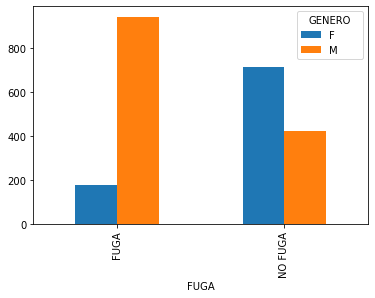

In [650]:
dfr_genero = pd.crosstab(df['FUGA'], df['GENERO'])
dfr_genero.plot.bar() #Se puede apreciar que hay una tendencia a que los hombres fuguen más que las mujeres

<AxesSubplot:xlabel='FUGA'>

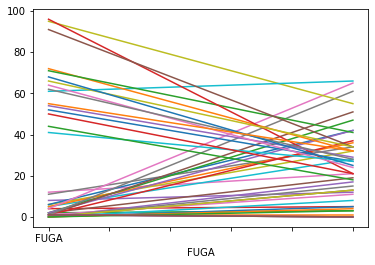

In [653]:
dfr_edad = pd.crosstab(df['FUGA'], df['EDAD'])
dfr_edad.plot(legend=None)
#Se ve que varias edades son las que afectan tanto positivo como negativo

<AxesSubplot:xlabel='FUGA'>

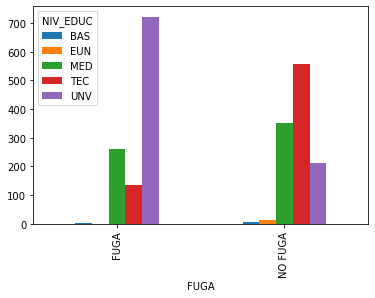

In [654]:
dfr_NIV_EDUC = pd.crosstab(df['FUGA'], df['NIV_EDUC'])
dfr_NIV_EDUC.plot.bar() 
#Para los 3 valores con más datos: MED, TEC, UNIV. Se observa que universitarios tienen más tendencia a fugar.

<AxesSubplot:xlabel='FUGA'>

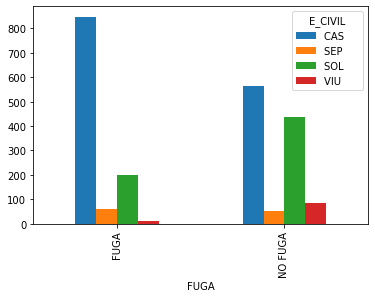

In [655]:
dfr_E_CIVIL = pd.crosstab(df['FUGA'], df['E_CIVIL'])
dfr_E_CIVIL.plot.bar() 
#Casados tienen a fugar más, y solteros junto a viudos tienen a fugar menos.

<AxesSubplot:xlabel='FUGA'>

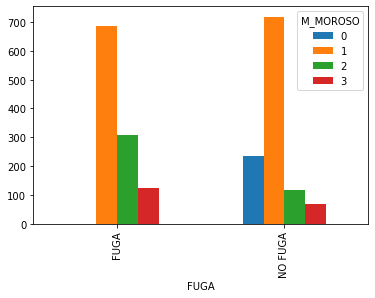

In [656]:
dfr_M_MOROSO = pd.crosstab(df['FUGA'], df['M_MOROSO'])
dfr_M_MOROSO.plot.bar()
#Aquí se aprecia que los no morosos son los clientes más fieles, no tienen fugas.

<AxesSubplot:xlabel='FUGA'>

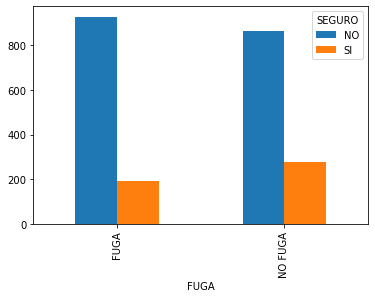

In [657]:
dfr_SEGURO = pd.crosstab(df['FUGA'], df['SEGURO'])
dfr_SEGURO.plot.bar()
#No hay una tendencia clara.

<AxesSubplot:xlabel='FUGA'>

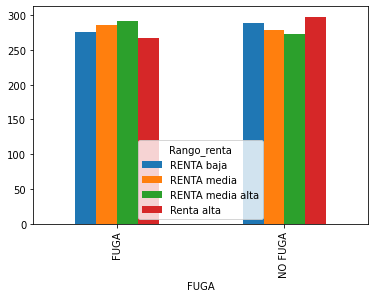

In [658]:
dfr_renta = pd.crosstab(dfr['FUGA'], dfr['Rango_renta'])
dfr_renta.plot.bar()
#No hay una tendencia clara.

<AxesSubplot:xlabel='FUGA'>

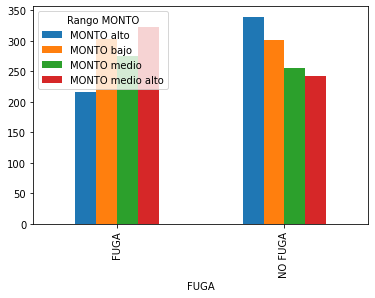

In [659]:
dfr_Rango_MONTO = pd.crosstab(dfr['FUGA'], dfr['Rango MONTO'])
dfr_Rango_MONTO.plot.bar()
#A medida que aumenta el monto, mayor posibilidad de fuga.

<AxesSubplot:xlabel='FUGA'>

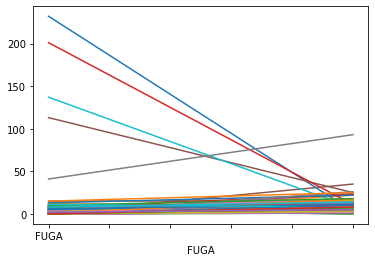

In [660]:
dfr_COD_OFI = pd.crosstab(dfr['FUGA'], dfr['COD_OFI'])
dfr_COD_OFI.plot(legend=None)
#Se puede apreciar que hay 5 oficinas que tienen una influencia en la FUGA

<AxesSubplot:xlabel='FUGA'>

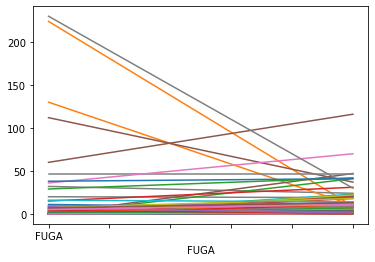

In [661]:
dfr_COD_COM = pd.crosstab(dfr['FUGA'], dfr['COD_COM'])
dfr_COD_COM.plot(legend=None)
#Se puede apreciar que hay 5 comunas que tienen una influencia en la FUGA

<AxesSubplot:xlabel='FUGA'>

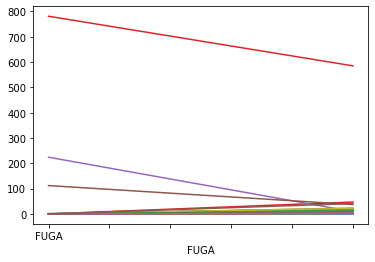

In [662]:
dfr_CIUDAD = pd.crosstab(dfr['FUGA'], dfr['CIUDAD'])
dfr_CIUDAD.plot(legend=None)
#Se puede apreciar que hay 3 ciudades que afectan en FUGA.

<AxesSubplot:xlabel='FUGA'>

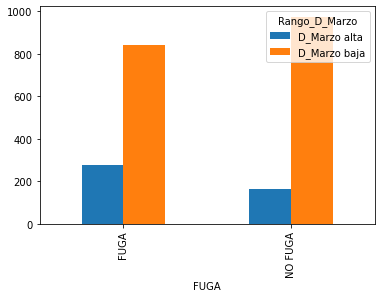

In [663]:
dfr_Rango_D_Marzo = pd.crosstab(dfr['FUGA'], dfr['Rango_D_Marzo'])
dfr_Rango_D_Marzo.plot.bar()
#No hay una tendencia clara en esta variable.

<AxesSubplot:xlabel='FUGA'>

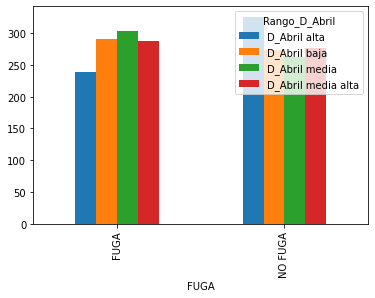

In [664]:
dfr_Rango_Rango_D_Abril = pd.crosstab(dfr['FUGA'], dfr['Rango_D_Abril'])
dfr_Rango_Rango_D_Abril.plot.bar()
#No hay una tendencia clara en esta variable.

<AxesSubplot:xlabel='FUGA'>

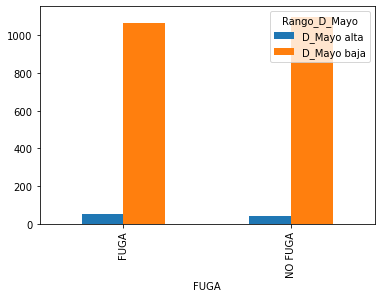

In [665]:
dfr_Rango_Rango_D_Mayo = pd.crosstab(dfr['FUGA'], dfr['Rango_D_Mayo'])
dfr_Rango_Rango_D_Mayo.plot.bar()
#No hay una tendencia clara en esta variable.

<AxesSubplot:xlabel='FUGA'>

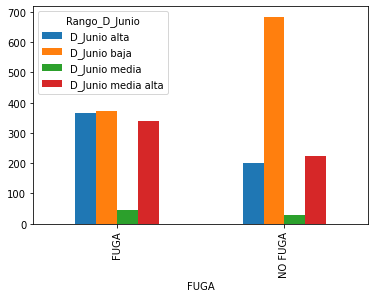

In [666]:
dfr_Rango_Rango_D_Junio = pd.crosstab(dfr['FUGA'], dfr['Rango_D_Junio'])
dfr_Rango_Rango_D_Junio.plot.bar()
#No hay una tendencia clara en esta variable. considerando el resto de los meses el caso de contabilidad baja en junio se podría tomar como un dato outlier.

<AxesSubplot:xlabel='FUGA'>

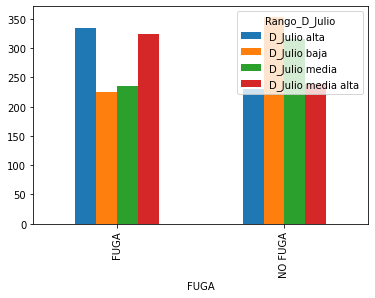

In [667]:
dfr_Rango_Rango_D_Julio = pd.crosstab(dfr['FUGA'], dfr['Rango_D_Julio'])
dfr_Rango_Rango_D_Julio.plot.bar()
#No hay una tendencia clara en esta variable

<AxesSubplot:xlabel='FUGA'>

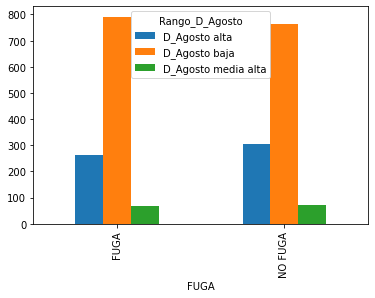

In [668]:
dfr_Rango_Rango_D_Agosto = pd.crosstab(dfr['FUGA'], dfr['Rango_D_Agosto'])
dfr_Rango_Rango_D_Agosto.plot.bar()
#No hay una tendencia clara en esta variable

<AxesSubplot:xlabel='FUGA'>

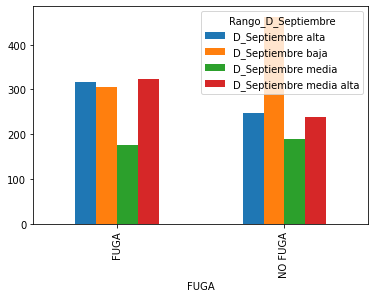

In [669]:
dfr_Rango_Rango_D_Septiembre = pd.crosstab(dfr['FUGA'], dfr['Rango_D_Septiembre'])
dfr_Rango_Rango_D_Septiembre.plot.bar()
#No hay una tendencia clara en esta variable

In [670]:
#Movemos columna independiente FUGA al final del DF
dfr['FUGA 2'] = dfr['FUGA']
dfr = dfr.drop(['FUGA'], axis=1)
dfr.rename(columns = {'FUGA 2':'FUGA'}, inplace = True)

# 2 Generar un modelo para la estimación de la fuga de clientes, a través de la construcción de modelos ad-hoc. (por ejemeplo: regresión logística, k-vecinos más cercanos, árboles de decisión, entre otros.)

Modelo 1 modelo supervisado con decision tree

In [671]:
#Hacemos una copia del nuevo DF que pasaremos a numérico, este lo copiamos previo a cambiar las numéricas por rangos.
dfn = df.copy(deep=False)

In [672]:
dfn.head(10)

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
0,M,746476.0,39.0,MED,CAS,68,213,LOS ANGELES,0.0,38292.0,0.0,434357.0,1766.0,911.0,3.400000e+03,2,2000000.0,NO,NO FUGA
1,F,11901.0,49.0,MED,VIU,16,89,SANTIAGO,0.0,0.0,0.0,0.0,480.0,0.0,0.000000e+00,1,7500000.0,SI,NO FUGA
2,M,1651421.0,39.0,TEC,CAS,90,16,ANTOFAGASTA,0.0,604169.0,0.0,0.0,3230.0,26489.0,2.925000e+03,1,8000000.0,NO,NO FUGA
3,F,638969.0,36.0,UNV,CAS,85,115,SANTIAGO,0.0,5125.0,0.0,198998.0,940.0,0.0,1.050000e+03,1,2600000.0,NO,NO FUGA
4,M,860113.0,44.0,TEC,CAS,45,80,SANTIAGO,0.0,11946.0,0.0,73959.0,1490.0,0.0,2.720000e+03,1,6400000.0,NO,NO FUGA
5,M,329463.0,40.0,TEC,CAS,53,92,SANTIAGO,0.0,187538.0,0.0,12008.0,6410.0,1180.0,1.540000e+03,2,7700000.0,NO,FUGA
6,M,28732.0,45.0,UNV,CAS,55,90,SANTIAGO,559984.0,532706.0,0.0,0.0,1464.0,156.0,1.523000e+16,1,2900000.0,NO,FUGA
7,F,11563.0,41.0,TEC,SOL,47,112,SANTIAGO,0.0,141317.0,0.0,525325.0,130.0,0.0,4.770000e+03,1,2100000.0,SI,NO FUGA
8,F,3044549.0,33.0,MED,CAS,22,1,ARICA,0.0,102078.0,0.0,0.0,440.0,0.0,0.000000e+00,1,1600000.0,NO,NO FUGA
9,F,3632707.0,39.0,MED,VIU,27,89,SANTIAGO,0.0,162658.0,0.0,445896.0,8650.0,0.0,9.070000e+03,1,2800000.0,NO,NO FUGA


In [673]:
#Primero pasamos a numérica todas las variables, partiendo por las ordinales
# Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[["BAS", "MED", 
                                      "TEC", "EUN", "UNV"]])
# Ajustamos el codificador con la variable DIANOM y la transformamos
encoder.fit(dfn[["NIV_EDUC"]])
dfn["NIV_EDUC"] = encoder.transform(dfn[["NIV_EDUC"]])

In [674]:
#A continuación seguimos con las variables categóricas ordinales
le = LabelEncoder()
dfn['GENERO'] = le.fit_transform(dfn['GENERO'])
dfn['E_CIVIL'] = le.fit_transform(dfn['E_CIVIL'])
dfn['COD_OFI'] = le.fit_transform(dfn['COD_OFI'])
dfn['COD_COM'] = le.fit_transform(dfn['COD_COM'])
dfn['CIUDAD'] = le.fit_transform(dfn['CIUDAD'])
dfn['SEGURO'] = le.fit_transform(dfn['SEGURO'])
dfn['FUGA'] = le.fit_transform(dfn['FUGA']) #importante ver que FUGA queda como 0  y NO FUGA como 1
dfn.head(10)

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
0,1,746476.0,39.0,1.0,0,95,43,33,0.0,38292.0,0.0,434357.0,1766.0,911.0,3.400000e+03,2,2000000.0,0,1
1,0,11901.0,49.0,1.0,3,45,106,63,0.0,0.0,0.0,0.0,480.0,0.0,0.000000e+00,1,7500000.0,1,1
2,1,1651421.0,39.0,2.0,0,117,35,3,0.0,604169.0,0.0,0.0,3230.0,26489.0,2.925000e+03,1,8000000.0,0,1
3,0,638969.0,36.0,4.0,0,112,17,63,0.0,5125.0,0.0,198998.0,940.0,0.0,1.050000e+03,1,2600000.0,0,1
4,1,860113.0,44.0,2.0,0,73,97,63,0.0,11946.0,0.0,73959.0,1490.0,0.0,2.720000e+03,1,6400000.0,0,1
5,1,329463.0,40.0,2.0,0,81,109,63,0.0,187538.0,0.0,12008.0,6410.0,1180.0,1.540000e+03,2,7700000.0,0,0
6,1,28732.0,45.0,4.0,0,83,107,63,559984.0,532706.0,0.0,0.0,1464.0,156.0,1.523000e+16,1,2900000.0,0,0
7,0,11563.0,41.0,2.0,2,75,15,63,0.0,141317.0,0.0,525325.0,130.0,0.0,4.770000e+03,1,2100000.0,1,1
8,0,3044549.0,33.0,1.0,0,51,1,4,0.0,102078.0,0.0,0.0,440.0,0.0,0.000000e+00,1,1600000.0,0,1
9,0,3632707.0,39.0,1.0,3,55,106,63,0.0,162658.0,0.0,445896.0,8650.0,0.0,9.070000e+03,1,2800000.0,0,1


In [675]:
#A continuación vemos como se comporta cada una de las variables
dfn.describe()

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
count,2259.000000,2.259000e+03,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2.259000e+03,2.259000e+03,2.259000e+03,2.259000e+03,2.259000e+03,2.259000e+03,2.259000e+03,2259.000000,2.259000e+03,2259.000000,2259.000000
mean,0.605578,8.576499e+05,43.669323,2.551129,0.742807,65.200531,65.809208,47.998229,1.528979e+05,2.716398e+05,1.045726e+05,1.914089e+05,9.626405e+14,1.531559e+15,1.020212e+15,1.253209,3.470031e+06,0.206729,0.504205
std,0.488834,1.386698e+06,8.403677,1.282305,1.006967,32.941114,41.428868,23.819200,4.980560e+05,4.000222e+05,8.772699e+05,6.752506e+05,4.849224e+15,7.285412e+15,5.507236e+15,0.753252,2.287836e+06,0.405049,0.500093
min,0.000000,1.760000e+02,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,5.000000e+05,0.000000,0.000000
25%,0.000000,1.008460e+05,39.000000,1.000000,0.000000,34.500000,21.000000,26.000000,0.000000e+00,1.794000e+04,0.000000e+00,0.000000e+00,7.000000e+01,0.000000e+00,0.000000e+00,1.000000,1.700000e+06,0.000000,0.000000
50%,1.000000,3.722190e+05,44.000000,2.000000,0.000000,62.000000,78.000000,63.000000,0.000000e+00,1.356500e+05,0.000000e+00,5.167000e+03,1.159000e+03,0.000000e+00,5.100000e+02,1.000000,2.600000e+06,0.000000,1.000000
75%,1.000000,8.290715e+05,50.000000,4.000000,2.000000,87.000000,105.000000,63.000000,0.000000e+00,3.729410e+05,0.000000e+00,1.756885e+05,3.455000e+03,2.304000e+03,2.785000e+03,2.000000,4.800000e+06,0.000000,1.000000
max,1.000000,8.454317e+06,130.000000,4.000000,3.000000,124.000000,116.000000,75.000000,9.458161e+06,5.495534e+06,1.839696e+07,2.063461e+07,7.491000e+16,7.948000e+16,7.552000e+16,3.000000,8.000000e+06,1.000000,1.000000


In [676]:
#Establecemos matriz de variables predictoras y vector de variable a predecir X e Y, utilizamos el dfn, que es el numérico.
df_x = dfn.iloc[:,0:-1]
df_y = dfn.iloc[:,-1]

In [677]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x.values, df_y.values, 
                                                    stratify=df_y.values, 
                                                    random_state=42, test_size=0.3 ) #aquí está seleccionado el 30% de las observaciones para test
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1581, 18) (1581,)
(678, 18) (678,)


In [678]:
md_list = []
score_train_list = []
score_test_list = []

for maxdepth in list(range(1,10)):
  tree_model = DecisionTreeClassifier(random_state=0, max_depth=maxdepth)
  tree_model.fit(X_train, y_train)

  ## Generación de listas
  md_list.append(maxdepth)
  score_train_list.append(100.0*tree_model.score(X_train, y_train))
  score_test_list.append(100.0*tree_model.score(X_test, y_test))

df1 = pd.DataFrame({"max_depth":md_list, 
                   "score_train":score_train_list,
                   "score_test":score_test_list})

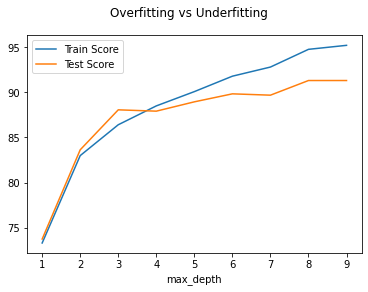

In [679]:
df1.set_index("max_depth", inplace=True)
df1["score_train"].plot(label="Train Score")
df1["score_test"].plot(label="Test Score")
plt.suptitle("Overfitting vs Underfitting")
plt.legend()
plt.show();

Se puede apreciar que después de max_depth 4 comienza a notarse un overfitting.

In [680]:
#Entrenamiento del modelo
tree_model = DecisionTreeClassifier(random_state=0, max_depth=4)
tree_model.fit(X_train, y_train) #Aquí se entrena

DecisionTreeClassifier(max_depth=4, random_state=0)

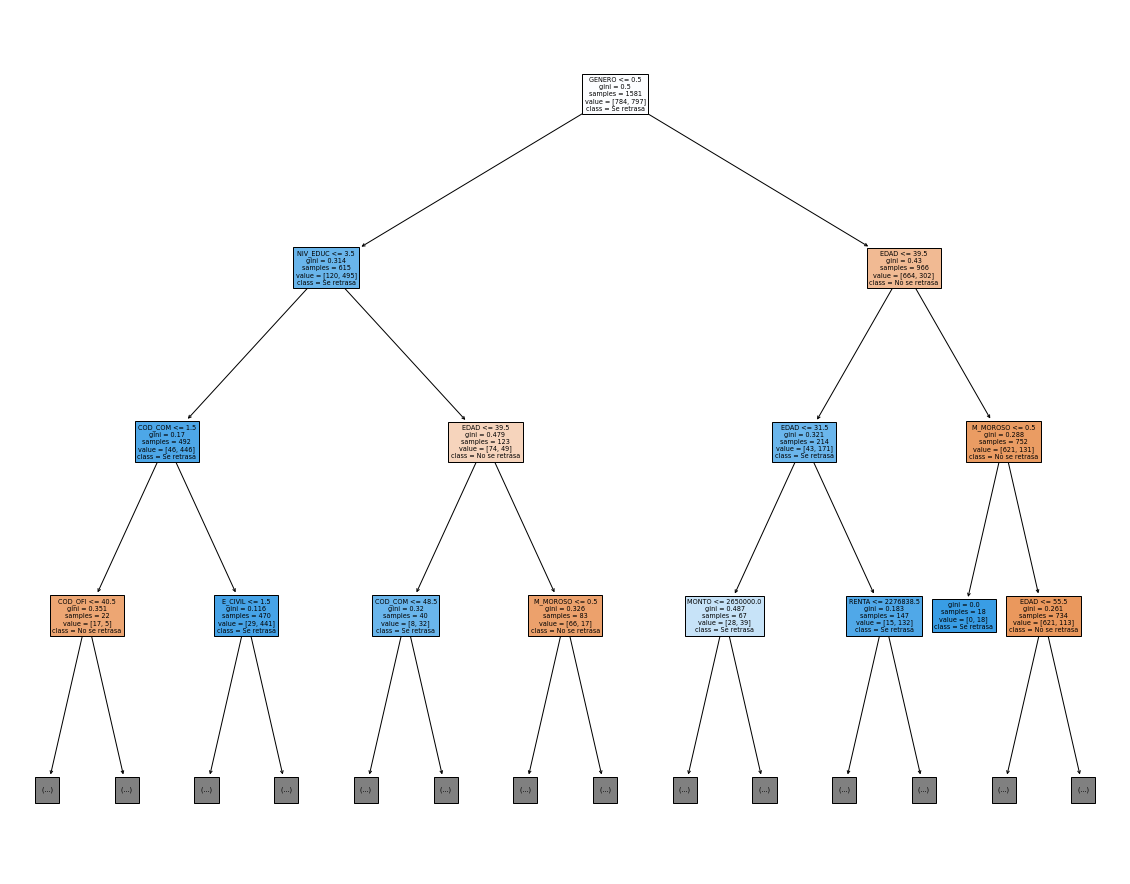

In [681]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(20,16))
plot_tree(tree_model, filled=True, max_depth=3, feature_names=df_x.columns, class_names=['No se retrasa','Se retrasa']) # Se pone 3 y no 4 acá para poder ver el grafo
plt.show()

In [682]:
#Evaluación del modelo
pred_train = tree_model.predict(X_train)
pred_test = tree_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*tree_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*tree_model.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 88.49
Precisión sobre los datos de test: 87.91


Para los datos de Train, que es nuestro 70% de los datos, se obtuvo un 88% de precisión, mientras que para los de test, se obtuvo un 88% también. 

A continuación evaluamos la matriz de confusión para evaluar como se comporta para cada output

Confusion matrix:



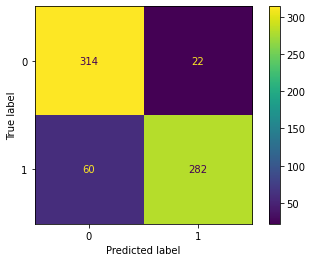

In [683]:
#Matriz de Confusión
print(f"Confusion matrix:\n")
disp = plot_confusion_matrix(tree_model, X_test, y_test)
plt.show()

Primero, importante recordar que FUGA es 0, y NO FUGA 1.
Por lo tanto el recall de FUGA es 84% y el recall de NO FUGA es 93%.

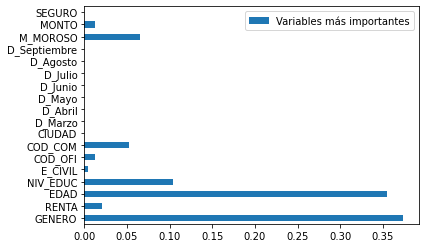

In [684]:
df_imp = pd.DataFrame(tree_model.feature_importances_.reshape(1,-1), columns=df_x.columns, index=["Variables más importantes"])
df_imp.T.plot.barh()
plt.legend()
plt.show();

Modelo 2 modelo supervisado con KNN

In [685]:
Primero escalamos las variables independientes, para eso apartamos la variable dependiente, y después de escalar la volvemos a anexar.

SyntaxError: invalid syntax (<ipython-input-685-108fc9a7aa2c>, line 1)

In [686]:
#Escalamos
scaler = StandardScaler()
scaled = scaler.fit(dfn.iloc[:,0:-1]).transform(dfn.iloc[:,0:-1])


In [687]:
#dfs es el dfn (df numérico) pero escalado (scaled)
dfs = pd.DataFrame(scaled, columns=dfn.columns[:-1])
dfs.head()

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO
0,0.807041,-0.080189,-0.555752,-1.209909,-0.737831,0.904829,-0.550685,-0.629809,-0.307057,-0.583466,-0.119229,0.359869,-0.198558,-0.210269,-0.18529,0.991641,-0.642684,-0.510493
1,-1.239094,-0.610036,0.634467,-1.209909,2.242074,-0.613367,0.970330,0.629958,-0.307057,-0.679212,-0.119229,-0.283526,-0.198558,-0.210269,-0.18529,-0.336229,1.761867,1.958892
2,0.807041,0.572545,-0.555752,-0.429891,-0.737831,1.572835,-0.743830,-1.889576,-0.307057,0.831461,-0.119229,-0.283526,-0.198558,-0.210269,-0.18529,-0.336229,1.980462,-0.510493
3,-1.239094,-0.157734,-0.912817,1.130146,-0.737831,1.421015,-1.178406,0.629958,-0.307057,-0.666397,-0.119229,0.011241,-0.198558,-0.210269,-0.18529,-0.336229,-0.380370,-0.510493
4,0.807041,0.001777,0.039358,-0.429891,-0.737831,0.236822,0.753043,0.629958,-0.307057,-0.649342,-0.119229,-0.173974,-0.198558,-0.210269,-0.18529,-0.336229,1.280956,-0.510493


In [688]:
#Concatenamos las variables X con la variable Y en un DF
dfs = pd.concat([dfs, dfn["FUGA"]], axis=1) 
dfs.head()

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
0,0.807041,-0.080189,-0.555752,-1.209909,-0.737831,0.904829,-0.550685,-0.629809,-0.307057,-0.583466,-0.119229,0.359869,-0.198558,-0.210269,-0.18529,0.991641,-0.642684,-0.510493,1.0
1,-1.239094,-0.610036,0.634467,-1.209909,2.242074,-0.613367,0.970330,0.629958,-0.307057,-0.679212,-0.119229,-0.283526,-0.198558,-0.210269,-0.18529,-0.336229,1.761867,1.958892,1.0
2,0.807041,0.572545,-0.555752,-0.429891,-0.737831,1.572835,-0.743830,-1.889576,-0.307057,0.831461,-0.119229,-0.283526,-0.198558,-0.210269,-0.18529,-0.336229,1.980462,-0.510493,1.0
3,-1.239094,-0.157734,-0.912817,1.130146,-0.737831,1.421015,-1.178406,0.629958,-0.307057,-0.666397,-0.119229,0.011241,-0.198558,-0.210269,-0.18529,-0.336229,-0.380370,-0.510493,1.0
4,0.807041,0.001777,0.039358,-0.429891,-0.737831,0.236822,0.753043,0.629958,-0.307057,-0.649342,-0.119229,-0.173974,-0.198558,-0.210269,-0.18529,-0.336229,1.280956,-0.510493,1.0


In [689]:
np.sum(dfs.isnull()) #chequeamos que no hayan valores nulos

GENERO          34
RENTA           34
EDAD            34
NIV_EDUC        34
E_CIVIL         34
COD_OFI         34
COD_COM         34
CIUDAD          34
D_Marzo         34
D_Abril         34
D_Mayo          34
D_Junio         34
D_Julio         34
D_Agosto        34
D_Septiembre    34
M_MOROSO        34
MONTO           34
SEGURO          34
FUGA            34
dtype: int64

In [690]:
dfs = dfs.dropna() #Eliminamos las filas con valores nulos

In [691]:
#Matriz de correlaciones
corrMatrix = dfs.corr() #Genereamos una matriz de correlaciones entre todas las variables
corrMatrix.style.background_gradient(cmap='coolwarm')

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
GENERO,1.000000,-0.072785,0.054920,0.295594,-0.317154,-0.073341,-0.078585,-0.026476,0.073460,-0.012089,-0.015083,0.036095,0.033962,0.008526,0.050471,0.235900,0.009532,-0.178483,0.019953
RENTA,-0.072785,1.000000,-0.167724,0.017563,0.074392,0.085794,0.098300,0.102245,0.038764,0.034485,-0.019471,0.047696,0.044374,-0.017926,-0.037592,0.009331,0.059845,-0.126824,0.012717
EDAD,0.054920,-0.167724,1.000000,-0.008774,-0.104110,-0.063745,-0.070413,-0.064486,0.027491,0.053723,0.041789,0.082993,0.029379,0.028258,0.050612,0.091813,0.140993,0.099725,-0.004429
NIV_EDUC,0.295594,0.017563,-0.008774,1.000000,-0.134127,-0.089240,-0.050807,0.034276,0.033435,-0.046042,-0.037716,0.021693,0.028471,0.008061,0.010524,0.140511,-0.108055,-0.095979,0.020553
E_CIVIL,-0.317154,0.074392,-0.104110,-0.134127,1.000000,-0.013286,-0.038178,-0.071095,-0.015727,0.038084,0.022973,-0.060843,-0.019572,0.007671,-0.032662,-0.158598,-0.018259,0.204727,0.005085
COD_OFI,-0.073341,0.085794,-0.063745,-0.089240,-0.013286,1.000000,0.313759,0.348243,-0.023150,0.051229,-0.012407,-0.035519,0.009073,-0.003388,0.026112,-0.062139,0.060129,-0.018549,0.002959
COD_COM,-0.078585,0.098300,-0.070413,-0.050807,-0.038178,0.313759,1.000000,0.549994,-0.041686,0.078319,-0.012294,-0.020494,-0.005354,0.016147,0.004349,-0.056951,0.113709,0.014973,-0.004338
CIUDAD,-0.026476,0.102245,-0.064486,0.034276,-0.071095,0.348243,0.549994,1.000000,-0.073768,0.052709,-0.021921,-0.040705,-0.031726,0.014736,-0.009988,-0.016934,0.034257,0.037413,0.005303
D_Marzo,0.073460,0.038764,0.027491,0.033435,-0.015727,-0.023150,-0.041686,-0.073768,1.000000,-0.000024,0.010478,0.079194,0.231346,0.009152,0.046349,0.137347,0.000151,0.063946,0.010740
D_Abril,-0.012089,0.034485,0.053723,-0.046042,0.038084,0.051229,0.078319,0.052709,-0.000024,1.000000,0.013913,0.027541,0.063442,0.107415,0.076852,-0.061323,0.243863,-0.014788,-0.051017


La mayor correlación se encuentra entre ciudad y código de comunas, lo que es esperable, ya que la ciudad contiene varias comunas.

Comienza generación de modelo KNN

In [692]:
#Establecemos matriz de variables predictoras y vector de variable a predecir X e Y
X = dfs.iloc[:,0:-1]
Y = dfs.iloc[:,-1]

In [693]:
#Se calcula el K con mejor accuracy o precisión 
preds_list = []
score_list = []
k_list = []

for k in list(range(1, 20, 2)):
  knn_model = KNeighborsClassifier(n_neighbors=k, weights="uniform", metric="minkowski")
  preds = cross_val_predict(knn_model, X, Y, cv=3, method="predict", n_jobs=3)
  score = cross_val_score(knn_model, X, Y, cv=3, scoring="accuracy")
  k_list.append(k)
  preds_list.append(preds)
  score_list.append(score.mean())

In [694]:
df_scores = pd.DataFrame({"K":k_list, 
                   "score":score_list
                   })

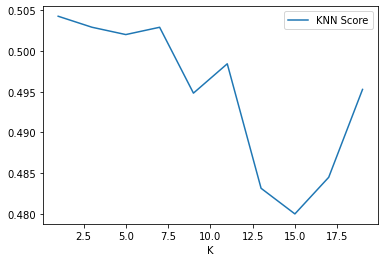

In [695]:
df_scores.set_index("K")["score"].plot(label="KNN Score")
plt.legend()
plt.show();

Aquí se puede apreciar que después de 2 cuando alcanza un KNN score de 0.75 es que después su subida es despreciable, por lo que se elige 2 para el siguiente paso

In [696]:
knn_model = KNeighborsClassifier(n_neighbors=17, weights="uniform", metric="minkowski")
preds = cross_val_predict(knn_model, X, Y, cv=3, method="predict", n_jobs=3)
score = cross_val_score(knn_model, X, Y, cv=3, scoring="accuracy", n_jobs=3)
score

array([0.48113208, 0.48921833, 0.4831309 ])

In [697]:
#Realizamos matriz de confusión
confusion_matrix(Y, preds)

array([[512, 592],
       [555, 566]], dtype=int64)

In [698]:
print(f"Informe de Clasificación:\n"
      f"{classification_report(Y, preds)}")

Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.48      0.46      0.47      1104
         1.0       0.49      0.50      0.50      1121

    accuracy                           0.48      2225
   macro avg       0.48      0.48      0.48      2225
weighted avg       0.48      0.48      0.48      2225



Según el informe se puede apreciar que predice cercano al azar para ambas variables, por lo que no es buen modelo.

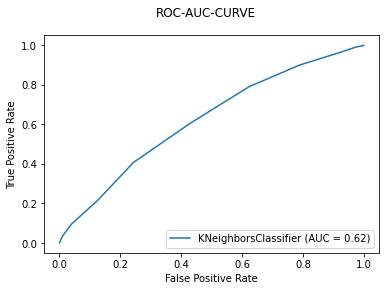

In [699]:
knn_model = KNeighborsClassifier(n_neighbors=17, weights="uniform", metric="minkowski")
knn_model.fit(X, Y)
plot_roc_curve(knn_model,X,Y)
plt.suptitle("ROC-AUC-CURVE")
plt.show()

El AUC es 62%, también muy cercano al 50%, por lo que también es un mal indicador.

In [700]:
#Hacemos una copia de el dfs que es el dfn escalado, y que ahora haremos una baraja dfb para ver si mejora el resultado
dfb=dfs.copy(deep=False)

In [701]:
#Establecemos matriz de variables predictoras y vector de variable a predecir X e Y
X = dfb.iloc[:,0:-1]
Y = dfb.iloc[:,-1]

In [702]:
#Se calcula el K con mejor accuracy o precisión 
preds_list = []
score_list = []
k_list = []

for k in list(range(1, 20, 2)):
  knn_model = KNeighborsClassifier(n_neighbors=k, weights="uniform", metric="minkowski")
  preds = cross_val_predict(knn_model, X, Y, cv=3, method="predict", n_jobs=3)
  score = cross_val_score(knn_model, X, Y, cv=3, scoring="accuracy")
  k_list.append(k)
  preds_list.append(preds)
  score_list.append(score.mean())

In [703]:
df_scores = pd.DataFrame({"K":k_list, 
                   "score":score_list
                   })

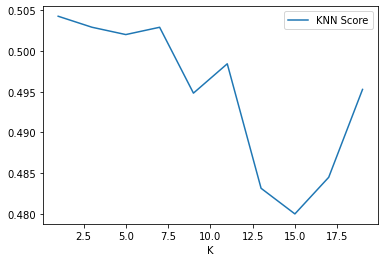

In [704]:
df_scores.set_index("K")["score"].plot(label="KNN Score")
plt.legend()
plt.show();

El más elevado sigue estando alrededor de 2

In [705]:
knn_model = KNeighborsClassifier(n_neighbors=10, weights="uniform", metric="minkowski")
preds = cross_val_predict(knn_model, X, Y, cv=3, method="predict", n_jobs=3)
score = cross_val_score(knn_model, X, Y, cv=3, scoring="accuracy", n_jobs=3)
score

array([0.49056604, 0.50943396, 0.49122807])

In [706]:
#Realizamos matriz de confusión
confusion_matrix(Y, preds)

array([[665, 439],
       [680, 441]], dtype=int64)

In [707]:
print(f"Informe de Clasificación:\n"
      f"{classification_report(Y, preds)}")

Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.49      0.60      0.54      1104
         1.0       0.50      0.39      0.44      1121

    accuracy                           0.50      2225
   macro avg       0.50      0.50      0.49      2225
weighted avg       0.50      0.50      0.49      2225



Ahora ha mejorado principalmente el recall de FUGA (0), y por ende el F1 Score, pero sigue siendo un mal resultado.

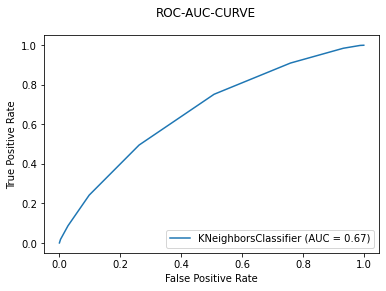

In [709]:
knn_model = KNeighborsClassifier(n_neighbors=10, weights="uniform", metric="minkowski")
knn_model.fit(X, Y)
plot_roc_curve(knn_model,X,Y)
plt.suptitle("ROC-AUC-CURVE")
plt.show()

El otro indicador, AUC, mejoró 5% porcentuales, pero aún no es un buen resultado.

Modelo 3 regresión logística

In [710]:
#Iniciamos el modelo
log_regression = LogisticRegression()

#ajustamos el modelo usando los datos de entrenamiento
log_regression.fit(X_train,y_train)

#usamos el modelo para predecir la probabilidad de que el valor de y dado sea 1
y_pred_proba = log_regression.predict_proba(X_test)[::,1]

#Calculamos el AUC del modelo
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#print AUC score
print(auc)

0.602152081592871


Modelo 4 Naive Bayes

Precisión sobre los datos de entrenamiento: 51.61
Precisión sobre los datos de test: 51.62
Confusion matrix:



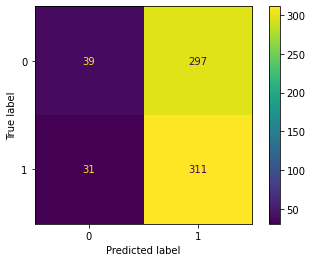

In [711]:

mnb_model = MultinomialNB(alpha=1.0) ## probar con 5 o 10
mnb_model.fit(X_train, y_train)
pred_train = mnb_model.predict(X_train)
pred_test = mnb_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*mnb_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*mnb_model.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
print(f"Confusion matrix:\n")
disp = plot_confusion_matrix(mnb_model, X_test, y_test, cmap=plt.cm.viridis,)
plt.show()

# 3 Determinar el mejor modelo que nos permita entender y ayude a predecir las razones en torno a la fuga de clientes.

a juzgar por las métricas de los 4 modelos, el que tiene mejores resultados es el modelo de tree regresion, alcanzando un 88% de precisión en los datos de test, muy por encima del 50-60% de los otros modelos

# 4 Proporcionar información necesaria y suficiente para la toma de decisiones comerciales, que permitan aumentar la tasa de retención de clientes, maximizando los beneficios esperados.

Tal y como se mostró  en la pregunta 2, las variables que más influían fueron Genero, edad, y nivel educacional, por lo que se podrían hacer campañas enfocadas a estas.
Por otro lado, se había visto que aunque hay pocas sucursales que afectan, algunas se destacaban por tener fugas notoriamente mayor al resto, por lo que también habría que revisarlo.
Por último, se podrían intentar medir nuevas variables que podrían ayudar a hace más preciso el modelo, tales cómo ¿Dejó un reclamo el cliente antes de irse?, ¿Cambio por un producto sustituo en otra empresa?, entre otras hipótesis que se podrían generar. También se puede seguir probando nuevos modelos de clasificaicón o de redes neuronales.